In [15]:
# 数据提取与预处理
import pandas as pd
import numpy as np
import os
import time

# print(os.getcwd())
trn_path = "data/Data/poly_reg/train_dataset.csv"
val_path = "data/Data/poly_reg/test_dataset.csv"
# 训练集数据处理
df_trn = pd.read_csv(trn_path, header=0)
x_trn = np.array(df_trn['x'].values).reshape(-1, 1)
y_trn = np.array(df_trn['y'].values)

# 验证集数据处理，与训练集处理方式保持一致
df_val = pd.read_csv(val_path, header=0)
x_val = np.array(df_val['x'].values).reshape(-1, 1)
y_val = np.array(df_val['y'].values)

# print(x_trn)

In [16]:
from sklearn.preprocessing import PolynomialFeatures

# 多项式阶数
degree = 8
# 转换器
poly = PolynomialFeatures(degree=degree)

# 转换特征
x_trn_poly = poly.fit_transform(x_trn)
# print(x_trn)
# print(x_trn_poly)
x_val_poly = poly.transform(x_val)

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# 训练模型
p1 = time.time()
model.fit(x_trn_poly, y_trn)
p2 = time.time()
print(p2-p1)

0.004535198211669922


In [18]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_val_poly)
mse = mean_squared_error(y_val, y_pred)
print(f"MSE: {mse}")

MSE: 0.5045193570740093


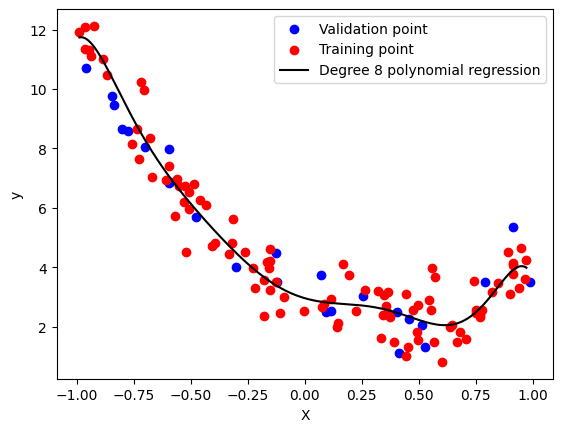

In [19]:
import matplotlib.pyplot as plt

x_range = np.linspace(x_trn.min(), x_trn.max(), 500).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

plt.scatter(x_val, y_val, color='blue', label='Validation point')
plt.scatter(x_trn, y_trn, color='red', label='Training point')
# plt.plot(x_val, y_pred, color='orange')
plt.plot(x_range, y_range_pred, color='black', label=f'Degree {degree} polynomial regression')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.savefig('result.png')
plt.show()

In [20]:
# 获取模型的系数
coefficients = model.coef_
intercept = model.intercept_

# 构造多项式表达式字符串
polynomial_expression = f"{intercept}"  # 截距项

for i, coef in enumerate(coefficients, start=0):
    term = f"{coef:.3f}*x^{i}" if coef != 0 else ''  # 去除系数为0的项
    polynomial_expression += (' + ' + term if term else '')

print(f"多项式回归模型对应的多项式表达式为: {polynomial_expression}")

多项式回归模型对应的多项式表达式为: 2.954138666711126 + -2.215*x^1 + 8.733*x^2 + -10.212*x^3 + -26.209*x^4 + 15.557*x^5 + 50.248*x^6 + -7.126*x^7 + -28.024*x^8


In [21]:
# 填写测试集 test.csv
test_csv = pd.read_csv('test.csv', header=0)
test_x = np.array(test_csv['x'].values).reshape(-1, 1)
test_x_poly = poly.transform(test_x)
# print(test_x)

pred_y = model.predict(test_x_poly).tolist()
# print(pred_y)
results = pd.DataFrame({'x':test_csv['x'].values, 'y':pred_y})
results.to_csv('results.csv', index=False)